# Data importing, exploratory analysis and cleaning.

This tutorial makes use of titanic dataset downloaded from [link](https://www.kaggle.com/c/titanic/data).

. Collection of data <br>
. importing the cvs format <br>
. Visuale analysis <br>
. Cleaning <br>

Import the dataset to jupyter and load the following libraries

Pylab is a magical fucntion that once called in ipython imports matplotlib and numpy modules and allows plotting images inline. Fantastic

In [7]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [80]:
#os.getcwd()
data = pd.read_csv("./data/titanic/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory Data Analysis

`Shape` -  Gives 891 rows and 12 columns
`head` - gives the first 10 lines
`tail` - gives last 10 lines
`describe` - gives summary of data


In [29]:
#data.shape()
#data.tail()
#data.describe()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Features Data Type

In [32]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### How many passengers survived?

In [35]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Check gender balance onboard and do a plot a histogram

In [36]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

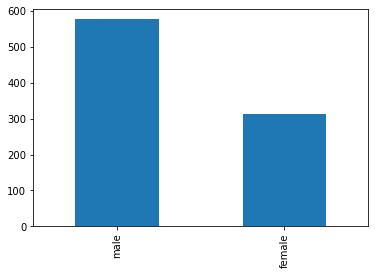

In [38]:
data.Sex.value_counts().plot(kind="bar")

Fare histogram

<AxesSubplot:>

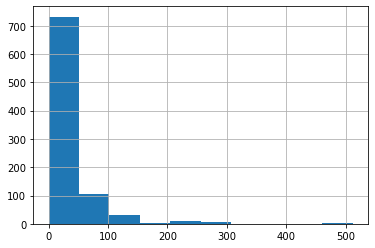

In [40]:
data.Fare.hist()

## Data Cleaning
a). Extracting the Name titles (Mr, Mrs, etc ) from the `Name` feature field <br>
b). Filling in missing information <br>
c). Separating/categorizing the uncategorized data in the dataset <br>
d). Creating csv file for the cleaned dataset <br>

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

Bar Chart plots for categorical features

In [53]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Survival based on Gender

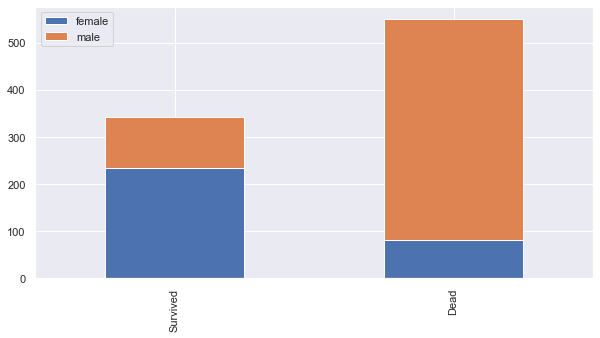

In [92]:
#Create a function for counting survived and non-survived based on sex
data_copy = data
def bar_chart(feature):
    survived = data_copy[data_copy["Survived"] == 1][feature].value_counts()
    dead = data_copy[data_copy["Survived"] == 0][feature].value_counts()
    df_new = pd.DataFrame([survived, dead])
    df_new.index = ["Survived","Dead"] #create column name
    df_new.plot(kind="bar", stacked=True, figsize = (10,5))

bar_chart("Sex")

More female survived than men

#### Survival based on class

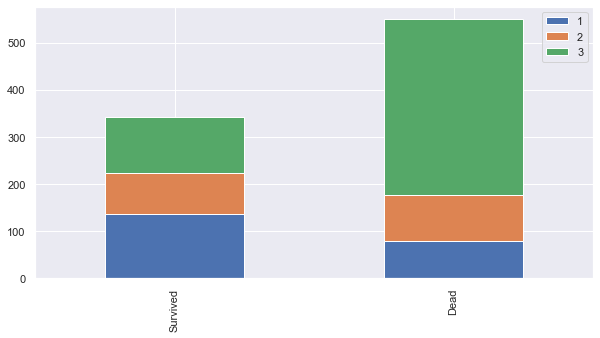

In [52]:
bar_chart("Pclass")

First and third class survived more than second class. More people in third class died. <br>

#### Survival based on sibling and Spouse

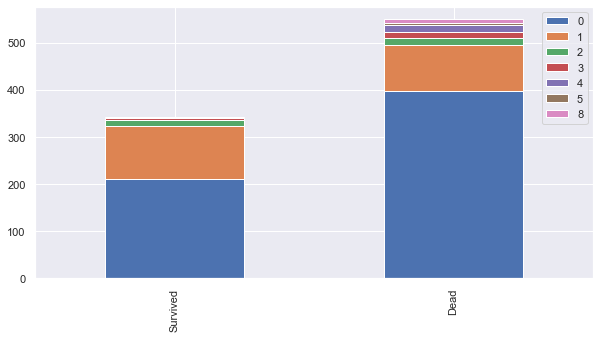

In [55]:
bar_chart("SibSp")

Passengers with no siblings/spouse more likely died. <br>

#### Survival based on parent/children

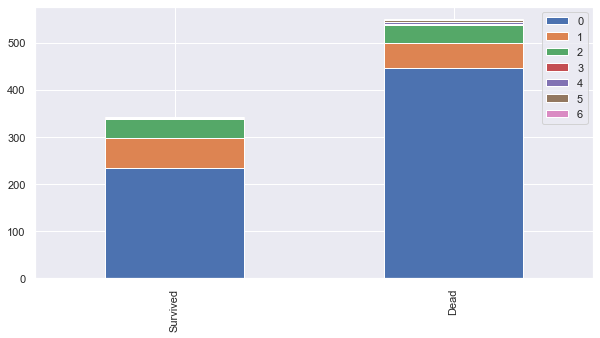

In [57]:
bar_chart("Parch")

Passengers without parents/siblings died more than others <br>

### Feature Extraction
Extract title feature from the dataset.

In [89]:
data_new = [data] #convert the data into a list  and create a title column
for dataset in data_new:
    dataset["Title"] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [71]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

## Cleaning the dataset
### Mapping the title values
The convetion implemented
.Mr = 0 <br>
.Miss = 1 <br>
.Mrs = 2 <br>
.Others = 3

In [90]:
#data_new = [data]

title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,
"Ms":3, "Lady":3,"Jonkheer":3,"Don":3,"Dona":3, "Mme":3,"Capt":3,"Sir":3}

for dataset in data_new:
    dataset["Title"] = dataset["Title"].map(title_mapping)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


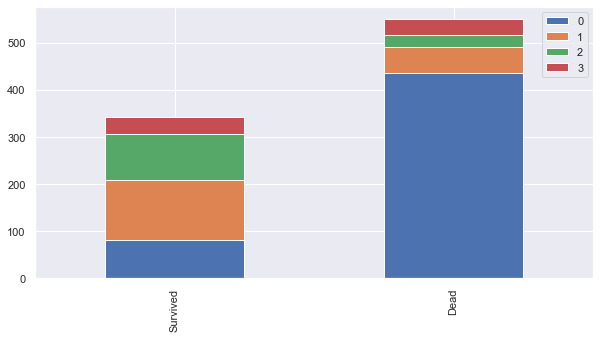

In [94]:
bar_chart("Title")

Its clear that individuals with the "Mr" title more likely died than others. This corroborates with the gender analysis where more male died than female.
Lets do the same with gender where we replace:<br>
.Male = 1 <br>
.Female = 0

In [98]:
data.Sex.replace(["male","female"],['1','0'], inplace=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


### Filling in missing information

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Missing values for `Age`, `Cabin` and `Embarked`. The code below gives count of missing valles.

In [105]:
data.isnull().sum() #determines sum of values missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64